# Part of Speech Recognition 

In [12]:
#pip install protobuf
import malaya 

In [13]:
string = "Hello"

In [14]:
# Show available tags 
malaya.pos.describe

[{'Tag': 'ADJ', 'Description': 'Adjective, kata sifat'},
 {'Tag': 'ADP', 'Description': 'Adposition'},
 {'Tag': 'ADV', 'Description': 'Adverb, kata keterangan'},
 {'Tag': 'ADX', 'Description': 'Auxiliary verb, kata kerja tambahan'},
 {'Tag': 'CCONJ', 'Description': 'Coordinating conjuction, kata hubung'},
 {'Tag': 'DET', 'Description': 'Determiner, kata penentu'},
 {'Tag': 'NOUN', 'Description': ' Noun, kata nama'},
 {'Tag': 'NUM', 'Description': 'Number, nombor'},
 {'Tag': 'PART', 'Description': 'Particle'},
 {'Tag': 'PRON', 'Description': 'Pronoun, kata ganti'},
 {'Tag': 'PROPN', 'Description': 'Proper noun, kata ganti nama khas'},
 {'Tag': 'SCONJ', 'Description': 'Subordinating conjunction'},
 {'Tag': 'SYM', 'Description': 'Symbol'},
 {'Tag': 'VERB', 'Description': 'Verb, kata kerja'},
 {'Tag': 'X', 'Description': 'Other'}]

In [15]:
model = malaya.pos.huggingface()
results = model.predict(string)
print(results)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[('Hello', 'NOUN')]


In [4]:
# this will also group similar tags for ya 
detailed_results = model.analyze(string)
print(detailed_results)

[{'text': ['KUALA', 'LUMPUR:', 'Keluarga', 'Lan', 'Zailan'], 'type': 'PROPN', 'score': 1.0, 'beginOffset': 0, 'endOffset': 5}, {'text': ['belum', 'membuat', 'keputusan'], 'type': 'NOUN', 'score': 1.0, 'beginOffset': 5, 'endOffset': 8}, {'text': ['untuk'], 'type': 'PROPN', 'score': 1.0, 'beginOffset': 8, 'endOffset': 9}, {'text': ['melakukan'], 'type': 'NOUN', 'score': 1.0, 'beginOffset': 9, 'endOffset': 10}, {'text': ['rawatan'], 'type': 'PROPN', 'score': 1.0, 'beginOffset': 10, 'endOffset': 11}, {'text': ['kemoterapi', 'bagi', 'merawat', 'kanser', 'pankreas'], 'type': 'NOUN', 'score': 1.0, 'beginOffset': 11, 'endOffset': 16}, {'text': ['tahap', 'empat', 'yang'], 'type': 'PROPN', 'score': 1.0, 'beginOffset': 16, 'endOffset': 19}, {'text': ['dihidapi'], 'type': 'ADP', 'score': 1.0, 'beginOffset': 19, 'endOffset': 20}, {'text': ['pelakon'], 'type': 'NOUN', 'score': 1.0, 'beginOffset': 20, 'endOffset': 21}, {'text': ['veteran'], 'type': 'PROPN', 'score': 1.0, 'beginOffset': 21, 'endOffset

In [5]:
# Include the tags inside the paragraph 
labeled_string = []
for group in detailed_results:
    words = ' '.join(group['text']) 
    pos_tag = group['type']          
    labeled_string.append(f"{words} ({pos_tag})")

final_output = ' '.join(labeled_string)
print(final_output)

KUALA LUMPUR: Keluarga Lan Zailan (PROPN) belum membuat keputusan (NOUN) untuk (PROPN) melakukan (NOUN) rawatan (PROPN) kemoterapi bagi merawat kanser pankreas (NOUN) tahap empat yang (PROPN) dihidapi (ADP) pelakon (NOUN) veteran (PROPN) itu. (NOUN) Isteri Lan, iaitu Ruby Sara Omar, (PROPN) 51, (NUM) berkata (NOUN) keputusan (PROPN) mengenai (NOUN) perkara (PROPN) itu (NOUN) akan (PROPN) dibuat (ADP) Isnin (PROPN) ini, selepas semua (NOUN) ahli (PROPN) keluarga (NOUN) berbincang. Pada jam empat (PROPN) petang (NOUN) tadi, (PROPN) doktor (ADP) beri penerangan (NOUN) sama ada (PROPN) hendak (NOUN) teruskan (PROPN) dengan (ADP) kemoterapi (NOUN) atau tidak. Namun, (PROPN) ketika ini, masih (NOUN) ada (PROPN) seorang (ADP) anak yang (PROPN) belum (NOUN) sampai (PROPN) dari (ADP) Muar, Johor. Doktor (PROPN) beri masa (NOUN) sehingga (ADP) Isnin (PROPN) ini (NOUN) untuk (PROPN) beri keputusan. (NOUN) Doktor juga pesan jangan (PROPN) buat keputusan (NOUN) terburu-buru. (PROPN)


# Visualization

In [6]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

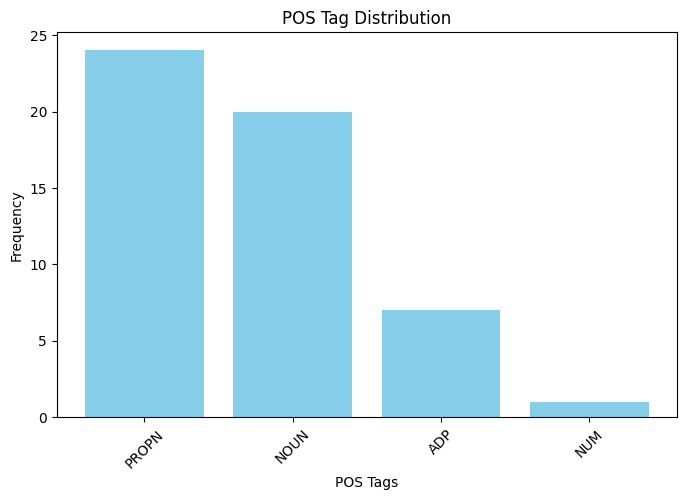

In [7]:
# Bar chart 
pos_counts = Counter(group['type'] for group in detailed_results)
plt.figure(figsize=(8, 5))
plt.bar(pos_counts.keys(), pos_counts.values(), color='skyblue')
plt.title("POS Tag Distribution")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

A bar chart can :
1. Visualize the distribution of POS tags.
2. Spot imbalances (skewed or missing categories).
3. Measure lexicon coverage compared to a gold standard.
4. Guide improvements in your lexicon by identifying specific gaps or limitations.

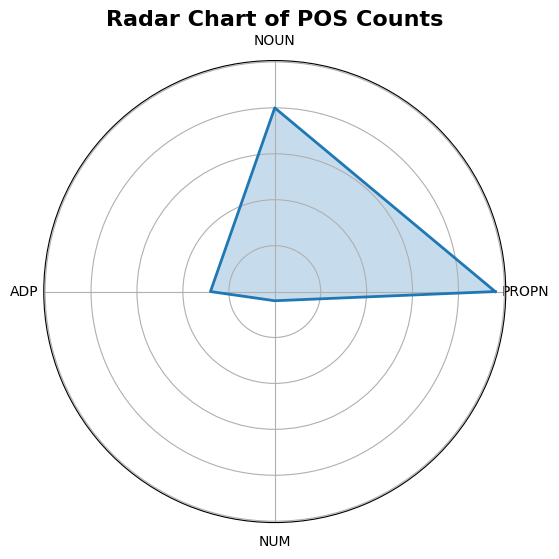

In [17]:
# Radar Chart 
pos_counts = Counter(group['type'] for group in detailed_results)

labels = list(pos_counts.keys()) 
values = list(pos_counts.values())  

num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values, linewidth=2, linestyle='solid', label='POS Counts')
ax.fill(angles, values, alpha=0.25)

ax.set_yticklabels([])  
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

ax.set_title('Radar Chart of POS Counts', size=16, color='black', fontweight='bold')
plt.show()